In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from scipy.stats import norm
import statistics as stat
import math
import warnings
warnings.filterwarnings("ignore")

In [2]:
mart = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv')

In [3]:
mart

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


## Data Exploration

In [4]:
mart.shape

(550068, 10)

In [5]:
mart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [6]:
mart['City_Category'] = mart['City_Category'].astype('category')
mart['Marital_Status'] = mart['Marital_Status'].astype('category')
mart['Gender'] = mart['Gender'].astype('category')

In [7]:
mart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  int64   
 1   Product_ID                  550068 non-null  object  
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  object  
 4   Occupation                  550068 non-null  int64   
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  object  
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  int64   
 9   Purchase                    550068 non-null  int64   
dtypes: category(3), int64(4), object(3)
memory usage: 31.0+ MB


In [8]:
mart['User_ID'].nunique()

5891

In [9]:
mart['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [10]:
mart['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [11]:
mart['Occupation'].value_counts()

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

In [12]:
mart['City_Category'].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

In [13]:
mart['Product_Category'].value_counts()

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category, dtype: int64

In [14]:
data_un = pd.Series({c: mart[c].nunique() for c in mart})
data_un

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

## Detecting outliers and null values

In [15]:
mart.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [16]:
mart.describe()

,User_ID,Occupation,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,5.404270,9263.968713
std,1.727592e+03,6.522660,3.936211,5023.065394
min,1.000001e+06,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,20.000000,23961.000000


**_Observations_**:

    - The minimum purchase made by the customer is about $9264.
    - The medium purchase is $8047.
    - The maximum purchase was made at $ 23961.
   

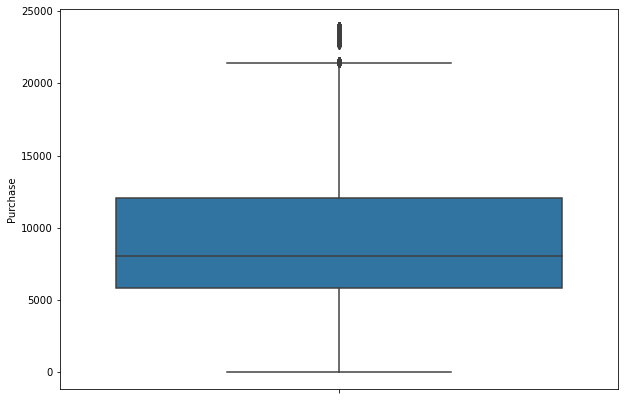

In [17]:
plt.figure(figsize=(10,7))
sns.boxplot(data=mart,y='Purchase')
plt.show()

**_Observations_**:-

    - The mean of the Purchase made by the customers of Walmart is $9263.96.
- The median of the Purchase is $8047.
    - The IQR of the Purchase becomes $6231.
    - Outliers can be seen after $21000.

In [18]:
mart['Purchase'].mean()

9263.968712959126

In [19]:
mart['Purchase'].median()

8047.0

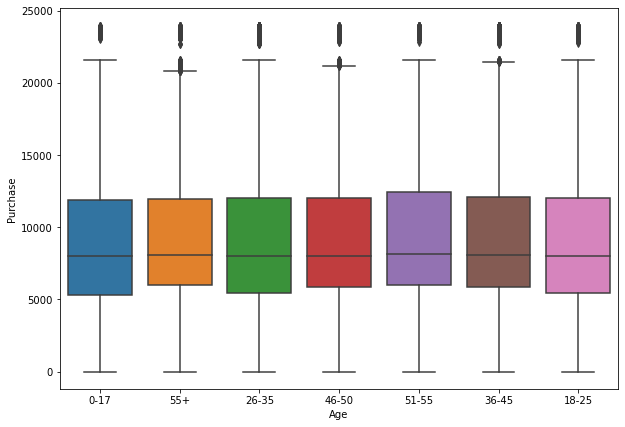

In [20]:
plt.figure(figsize=(10,7))
sns.boxplot(data=mart,x='Age',y='Purchase')
plt.show()

**_Observations_**:-

    - According to Purchase, all the Age groups have almost the same median.
    - Every Age group has outliers that startes from around $21000.
    

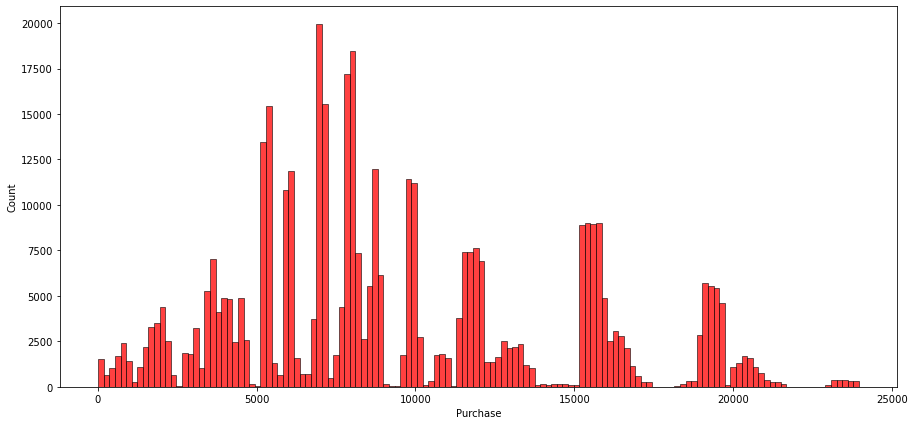

In [21]:
male_pur = mart[mart['Gender'] == 'M']
plt.figure(figsize=(15,7))
sns.histplot(data=male_pur, x='Purchase',color='red')
plt.show()

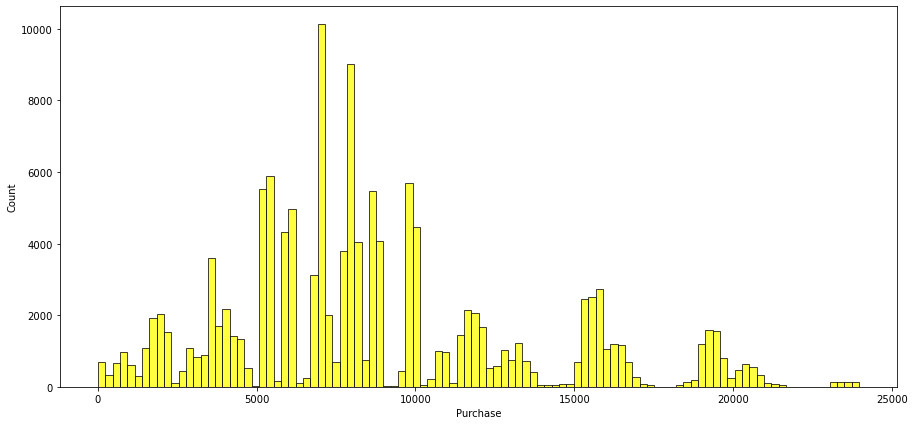

In [22]:
fem_pur = mart[mart['Gender'] == 'F']
plt.figure(figsize=(15,7))
sns.histplot(data=fem_pur, x='Purchase',color='Yellow')
plt.show()

In [23]:
fem_pur['Purchase'].mean()

8734.565765155476

In [24]:
male_pur['Purchase'].mean()

9437.526040472265

**_Observations_**:-
    
    - 75% of the customers are male while only 25% of the customers are female.
    - The mean of Male Purchase is higher than the Female Purchase.
    - Both male and female Purchase's are dominant bewteen $5000 and $10000.

## Confidence interval for estimating the population mean

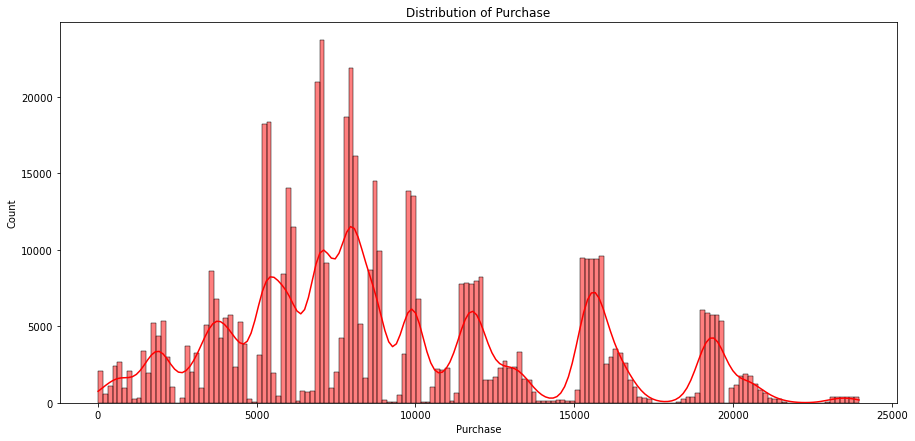

In [25]:
plt.figure(figsize=(15,7))
sns.histplot(x=mart['Purchase'],color='r',kde=True)
plt.title('Distribution of Purchase')
plt.show()

In [26]:
print(f'The mean of the Purchase:',mart['Purchase'].mean(),'.')
print(f'The strandard deviation of Purchase:',mart['Purchase'].std(),'.')
print(f'The variance is', mart['Purchase'].var(),'.')

The mean of the Purchase: 9263.968712959126 .
The strandard deviation of Purchase: 5023.065393820627 .
The variance is 25231185.950598367 .


# Sampling Distrubution of mean of all customers

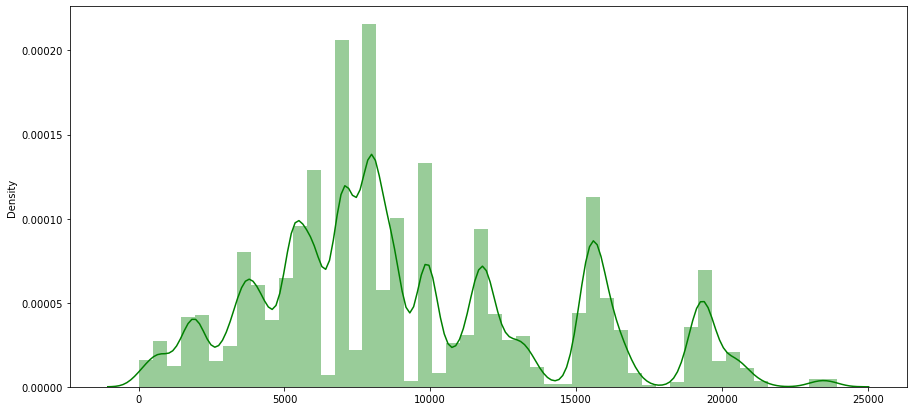

In [27]:
plt.figure(figsize=(15,7))
sns.distplot(x=mart['Purchase'],color='g')
plt.show()

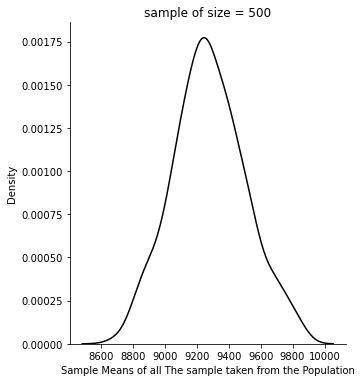

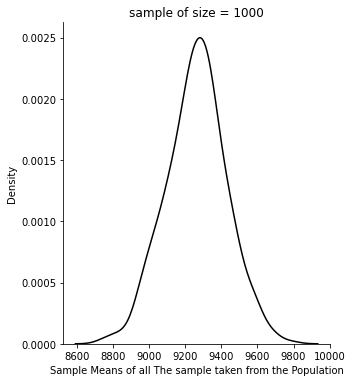

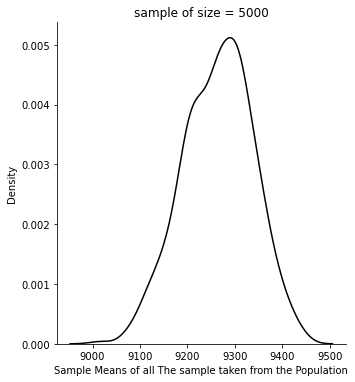

In [28]:
samp_size = [500,1000,5000]
for i in samp_size:
    means = []
    for j in range(500):
        sample = mart.sample(n = i)
        means.append(sample['Purchase'].mean())
    sns.displot(means, kind='kde',color = 'black')
    plt.xlabel('Sample Means of all The sample taken from the Population')
    plt.title(f'sample of size = {i}')

**_Observations_**:-

In [29]:
all90 = st.norm.interval(alpha=0.90,loc=np.mean(mart['Purchase']),scale=st.sem(mart['Purchase']))
print(f'With a 90 % confidence interval, the average of all purchase mean lies between',all90)
all95 = st.norm.interval(alpha=0.95,loc=np.mean(mart['Purchase']),scale=st.sem(mart['Purchase']))
print(f'With a 95 % confidence interval, the average of all purchase mean lies between',all95)
all99 = st.norm.interval(alpha=0.99,loc=np.mean(mart['Purchase']),scale=st.sem(mart['Purchase']))
print(f'With a 98 % confidence interval, the average of all purchase mean lies between',all99)

With a 90 % confidence interval, the average of all purchase mean lies between (9252.82864350368, 9275.10878241457)
With a 95 % confidence interval, the average of all purchase mean lies between (9250.694501466876, 9277.242924451375)
With a 98 % confidence interval, the average of all purchase mean lies between (9246.523441916932, 9281.41398400132)


## Sampling Distribution of sample means of male and female customers

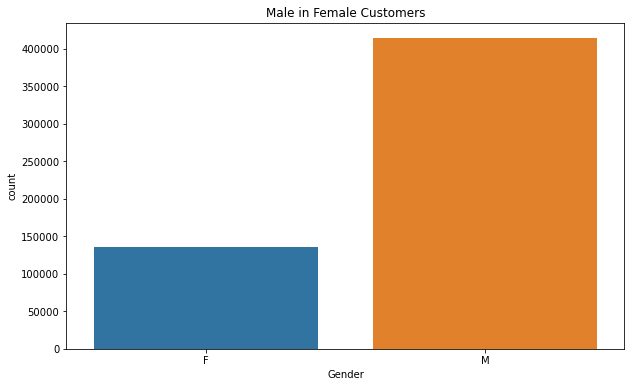

In [30]:
plt.figure(figsize=(10,6))
sns.countplot(x=mart['Gender'])
plt.title('Male in Female Customers')
plt.show()

In [31]:
fem_pur.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
14,1000006,P00231342,F,51-55,9,A,1,0,5,5378


In [33]:
fem_pur.describe()

,User_ID,Occupation,Product_Category,Purchase
count,1.358090e+05,135809.000000,135809.000000,135809.000000
mean,1.003130e+06,6.740540,5.717714,8734.565765
std,1.786631e+03,6.239639,3.696752,4767.233289
min,1.000001e+06,0.000000,1.000000,12.000000
25%,1.001569e+06,1.000000,3.000000,5433.000000
50%,1.003159e+06,4.000000,5.000000,7914.000000
75%,1.004765e+06,11.000000,8.000000,11400.000000
max,1.006039e+06,20.000000,20.000000,23959.000000


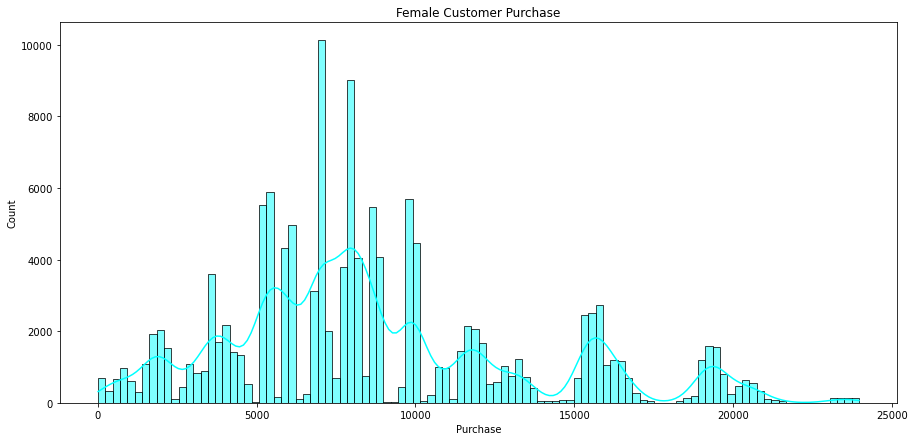

In [34]:
plt.figure(figsize=(15,7))
sns.histplot(x=fem_pur['Purchase'],color='cyan',kde=True)
plt.title('Female Customer Purchase')
plt.show()

In [ ]:
samp_size = [500,1000,5000,1000]
for i in samp_size:
    means = []
    for j in range(500):
        sample = fem_pur.sample(n = i)
        means.append(sample['Purchase'].mean())
    sns.displot(means, kind='kde',color = 'blue')
    plt.xlabel('Sample Means of all The sample taken from female customers')
    plt.title(f'sample of size = {i}')

In [42]:
fem90 = st.norm.interval(alpha=0.90,loc=np.mean(fem_pur['Purchase']),scale=st.sem(fem_pur['Purchase']))
print(f'With a 90 % confidence interval, the average of female purchase mean lies between',fem90)
fem95 = st.norm.interval(alpha=0.95,loc=np.mean(fem_pur['Purchase']),scale=st.sem(fem_pur['Purchase']))
print(f'With a 95 % confidence interval, the average of female purchase mean lies between',fem95)
fem99 = st.norm.interval(alpha=0.99,loc=np.mean(fem_pur['Purchase']),scale=st.sem(fem_pur['Purchase']))
print(f'With a 98 % confidence interval, the average of female purchase mean lies between',fem99)

With a 90 % confidence interval, the average of female purchase mean lies between (8713.287834648021, 8755.84369566293)
With a 95 % confidence interval, the average of female purchase mean lies between (8709.21154714068, 8759.919983170272)
With a 98 % confidence interval, the average of female purchase mean lies between (8701.244674438389, 8767.886855872563)


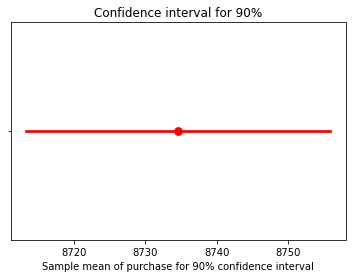

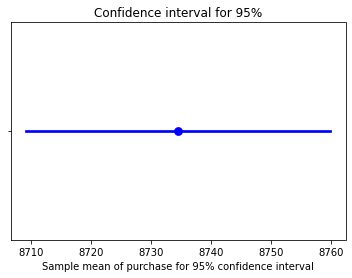

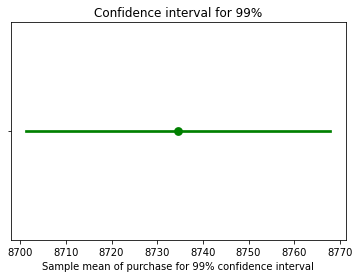

In [43]:
sns.pointplot(x=[8713.287834648021, 8755.84369566293],color='r')
plt.title('Confidence interval for 90%')
plt.xlabel('Sample mean of purchase for 90% confidence interval')
plt.show()

sns.pointplot(x=[8709.21154714068, 8759.919983170272],color='b')
plt.title('Confidence interval for 95%')
plt.xlabel('Sample mean of purchase for 95% confidence interval')
plt.show()

sns.pointplot(x=[8701.244674438389, 8767.886855872563],color='g')
plt.title('Confidence interval for 99%')
plt.xlabel('Sample mean of purchase for 99% confidence interval')
plt.show()

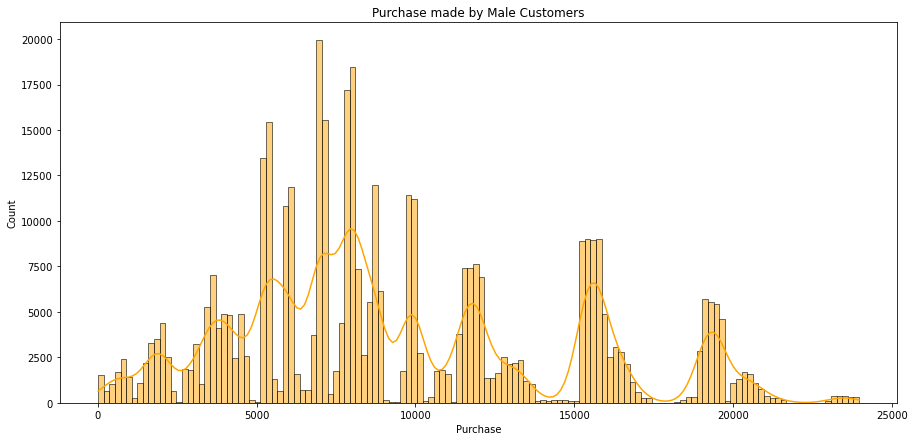

In [44]:
plt.figure(figsize=(15,7))
sns.histplot(x=male_pur['Purchase'],color='orange',kde=True)
plt.title('Purchase made by Male Customers')
plt.show()

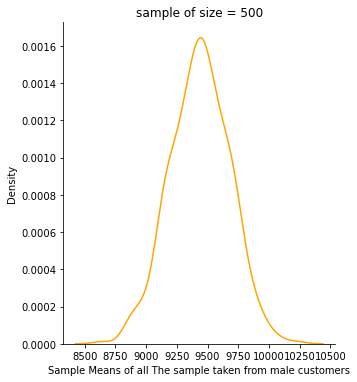

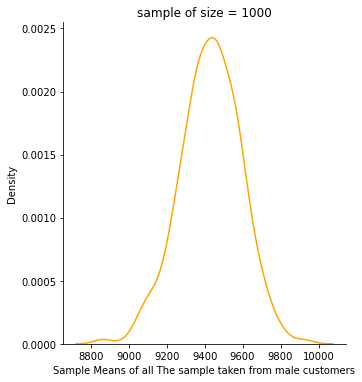

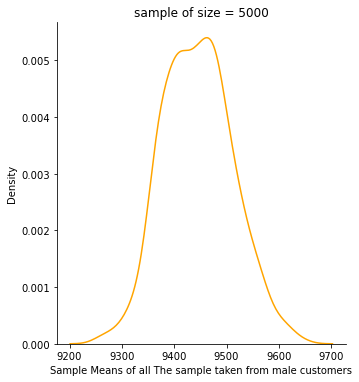

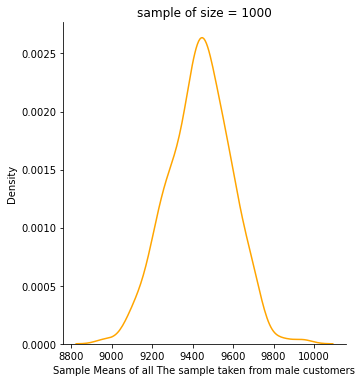

In [45]:
samp_size = [500,1000,5000,1000]
for i in samp_size:
    means = []
    for j in range(500):
        sample = male_pur.sample(n = i)
        means.append(sample['Purchase'].mean())
    sns.displot(means, kind='kde',color = 'orange')
    plt.xlabel('Sample Means of all The sample taken from male customers')
    plt.title(f'sample of size = {i}')

In [46]:
male90 = st.norm.interval(alpha=0.90,loc=np.mean(male_pur['Purchase']),scale=st.sem(male_pur['Purchase']))
print(f'With a 90 % confidence interval, the average of male purchase mean lies between',male90)
male95 = st.norm.interval(alpha=0.95,loc=np.mean(male_pur['Purchase']),scale=st.sem(male_pur['Purchase']))
print(f'With a 95 % confidence interval, the average of male purchase mean lies between',male95)
male99 = st.norm.interval(alpha=0.99,loc=np.mean(male_pur['Purchase']),scale=st.sem(male_pur['Purchase']))
print(f'With a 98 % confidence interval, the average of male purchase mean lies between',male99)

With a 90 % confidence interval, the average of male purchase mean lies between (9424.512497305488, 9450.539583639042)
With a 95 % confidence interval, the average of male purchase mean lies between (9422.01944736257, 9453.032633581959)
With a 98 % confidence interval, the average of male purchase mean lies between (9417.146922669479, 9457.90515827505)


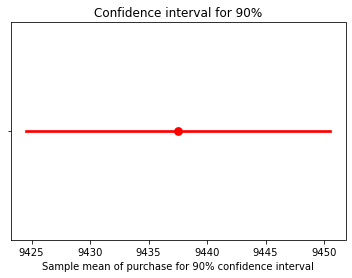

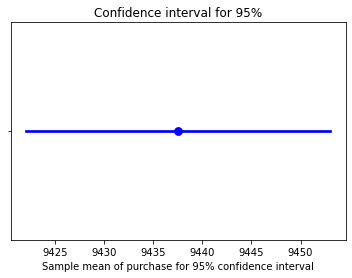

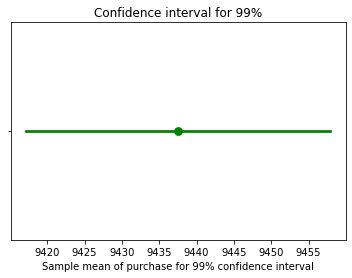

In [47]:
sns.pointplot(x=[9424.512497305488, 9450.539583639042],color='r')
plt.title('Confidence interval for 90%')
plt.xlabel('Sample mean of purchase for 90% confidence interval')
plt.show()

sns.pointplot(x=[9422.01944736257, 9453.032633581959],color='b')
plt.title('Confidence interval for 95%')
plt.xlabel('Sample mean of purchase for 95% confidence interval')
plt.show()

sns.pointplot(x=[9417.146922669479, 9457.90515827505],color='g')
plt.title('Confidence interval for 99%')
plt.xlabel('Sample mean of purchase for 99% confidence interval')
plt.show()

## Sampling Distributiuon among married and unmarried Customers 

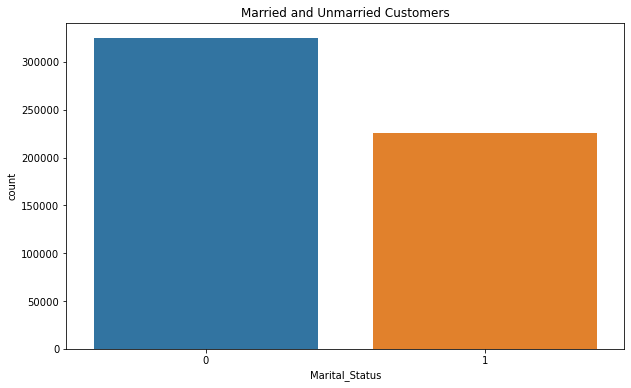

In [48]:
plt.figure(figsize=(10,6))
sns.countplot(x=mart['Marital_Status'])
plt.title('Married and Unmarried Customers')
plt.show()

In [49]:
married = mart[mart['Marital_Status'] == 0]
married.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


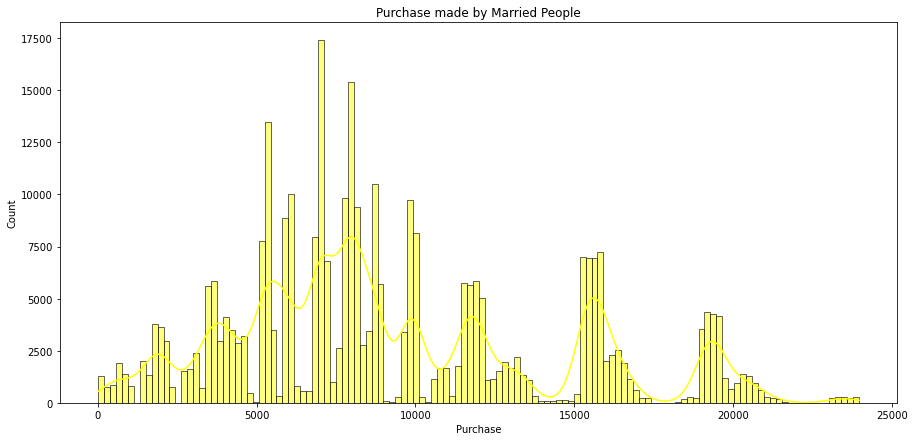

In [50]:
plt.figure(figsize=(15,7))
sns.histplot(x=married['Purchase'],color='yellow',kde=True)
plt.title('Purchase made by Married People')
plt.show()

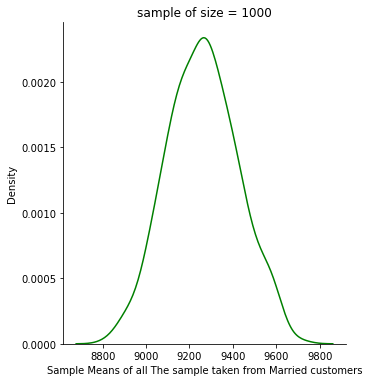

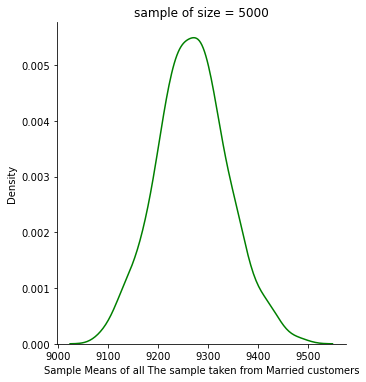

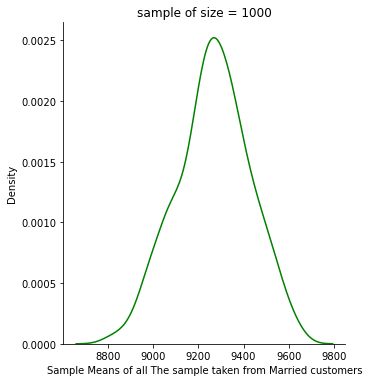

In [83]:
samp_size = [1000,5000,1000]
for i in samp_size:
    means = []
    for j in range(500):
        sample = married.sample(n = i)
        means.append(sample['Purchase'].mean())
    sns.displot(means, kind='kde',color = 'green')
    plt.xlabel('Sample Means of all The sample taken from Married customers')
    plt.title(f'sample of size = {i}')

In [51]:
married90 = st.norm.interval(alpha=0.90,loc=np.mean(married['Purchase']),scale=st.sem(married['Purchase']))
print(f'With a 90 % confidence interval, the average of married customer purchase mean lies between',married90)
married95 = st.norm.interval(alpha=0.95,loc=np.mean(married['Purchase']),scale=st.sem(married['Purchase']))
print(f'With a 95 % confidence interval, the average of married customer purchase mean lies between',married95)
married99 = st.norm.interval(alpha=0.99,loc=np.mean(married['Purchase']),scale=st.sem(married['Purchase']))
print(f'With a 98 % confidence interval, the average of married customer purchase mean lies between',married99)

With a 90 % confidence interval, the average of married customer purchase mean lies between (9251.396385823671, 9280.418852019342)
With a 95 % confidence interval, the average of married customer purchase mean lies between (9248.61641818668, 9283.198819656332)
With a 98 % confidence interval, the average of married customer purchase mean lies between (9243.183129136169, 9288.632108706845)


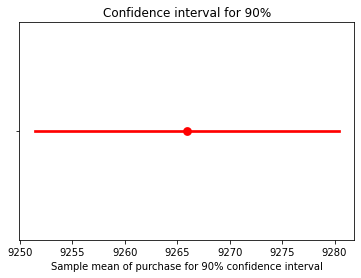

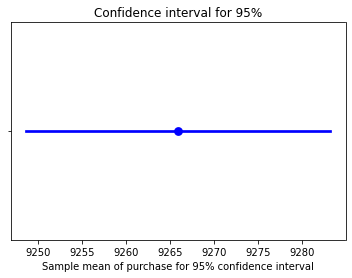

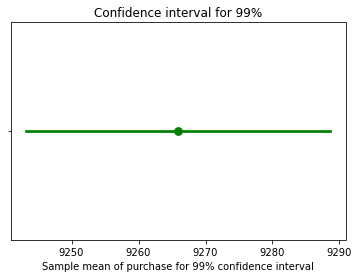

In [52]:
sns.pointplot(x=[9251.396385823671, 9280.418852019342],color='r')
plt.title('Confidence interval for 90%')
plt.xlabel('Sample mean of purchase for 90% confidence interval')
plt.show()

sns.pointplot(x=[9248.61641818668, 9283.198819656332],color='b')
plt.title('Confidence interval for 95%')
plt.xlabel('Sample mean of purchase for 95% confidence interval')
plt.show()

sns.pointplot(x=[9243.183129136169, 9288.632108706845],color='g')
plt.title('Confidence interval for 99%')
plt.xlabel('Sample mean of purchase for 99% confidence interval')
plt.show()

In [53]:
unmarried = mart[mart['Marital_Status'] == 1]
unmarried.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,7871
10,1000005,P00251242,M,26-35,20,A,1,1,5,5254


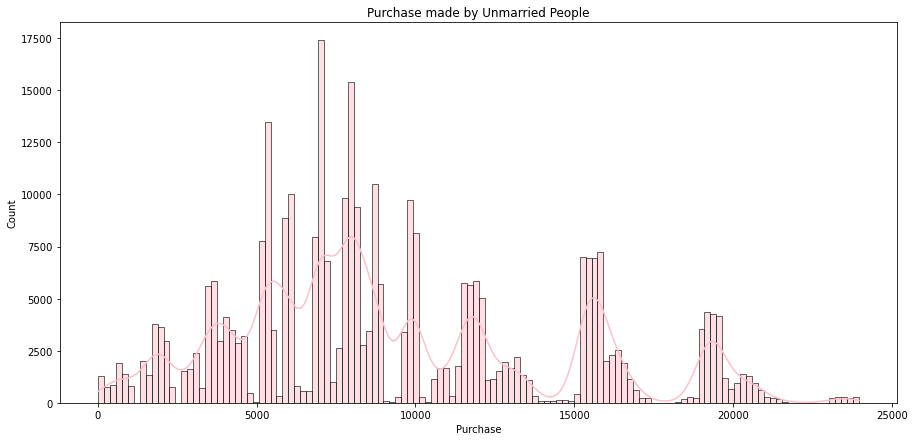

In [54]:
plt.figure(figsize=(15,7))
sns.histplot(x=married['Purchase'],color='pink',kde=True)
plt.title('Purchase made by Unmarried People')
plt.show()

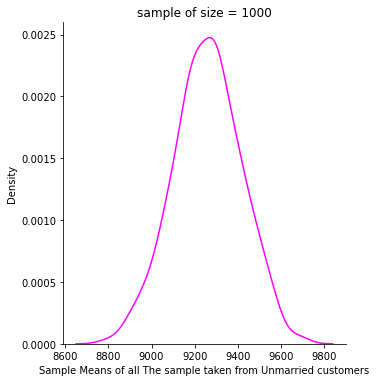

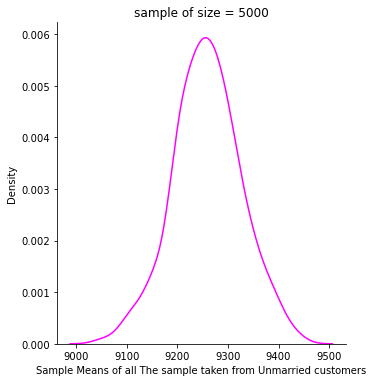

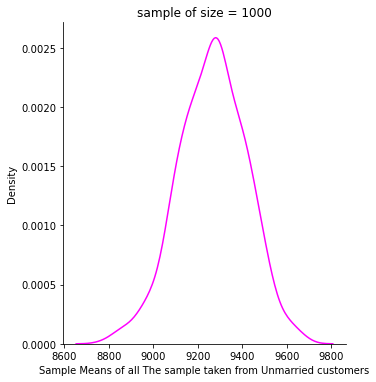

In [82]:
samp_size = [1000,5000,1000]
for i in samp_size:
    means = []
    for j in range(500):
        sample = unmarried.sample(n = i)
        means.append(sample['Purchase'].mean())
    sns.displot(means, kind='kde',color = 'magenta')
    plt.xlabel('Sample Means of all The sample taken from Unmarried customers')
    plt.title(f'sample of size = {i}')

In [55]:
unmarried90 = st.norm.interval(alpha=0.90,loc=np.mean(unmarried['Purchase']),scale=st.sem(unmarried['Purchase']))
print(f'With a 90 % confidence interval, the average of unmarried customer purchase mean lies between',unmarried90)
unmarried95 = st.norm.interval(alpha=0.95,loc=np.mean(unmarried['Purchase']),scale=st.sem(unmarried['Purchase']))
print(f'With a 95 % confidence interval, the average of unmarried customer purchase mean lies between',unmarried95)
unmarried99 = st.norm.interval(alpha=0.99,loc=np.mean(unmarried['Purchase']),scale=st.sem(unmarried['Purchase']))
print(f'With a 98 % confidence interval, the average of unmarried customer purchase mean lies between',unmarried99)

With a 90 % confidence interval, the average of unmarried customer purchase mean lies between (9243.790713903045, 9278.558434261702)
With a 95 % confidence interval, the average of unmarried customer purchase mean lies between (9240.460427057078, 9281.888721107669)
With a 98 % confidence interval, the average of unmarried customer purchase mean lies between (9233.951570329937, 9288.39757783481)


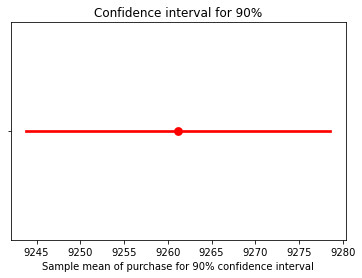

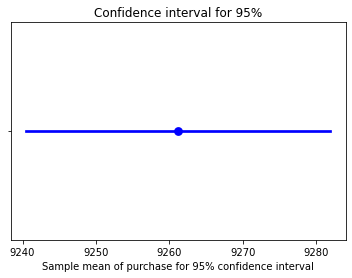

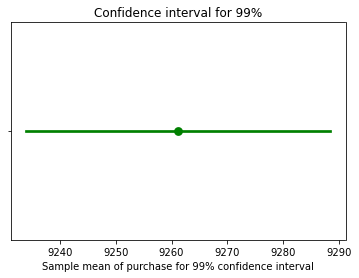

In [56]:
sns.pointplot(x=[9243.790713903045, 9278.558434261702],color='r')
plt.title('Confidence interval for 90%')
plt.xlabel('Sample mean of purchase for 90% confidence interval')
plt.show()

sns.pointplot(x=[9240.460427057078, 9281.888721107669],color='b')
plt.title('Confidence interval for 95%')
plt.xlabel('Sample mean of purchase for 95% confidence interval')
plt.show()

sns.pointplot(x=[9233.951570329937, 9288.39757783481],color='g')
plt.title('Confidence interval for 99%')
plt.xlabel('Sample mean of purchase for 99% confidence interval')
plt.show()

# Confidence interval for different age groups

In [57]:
product_age = mart.Age.value_counts().index
product_val = mart.Age.value_counts().values

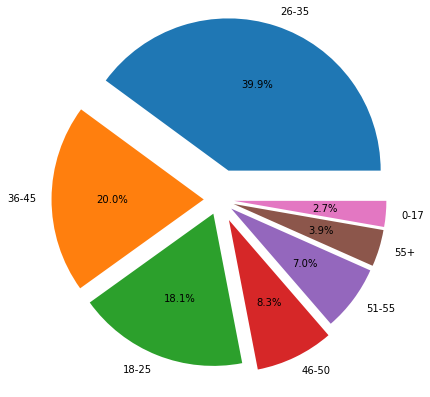

In [58]:
plt.figure(figsize=(15,7))
expl = (0.2, 0.1, 0.1, 0.15, 0.1,0.1 ,0.1)
plt.pie(product_val, explode=expl, labels=product_age, autopct='%1.1f%%')
plt.show()

**_Observations_**:

    - Major part of the Walmart is occupied by the age group between 26-35 for about 40%.
    - Age group between 35- 45 and 18-25 occupies about 48% of the customers.

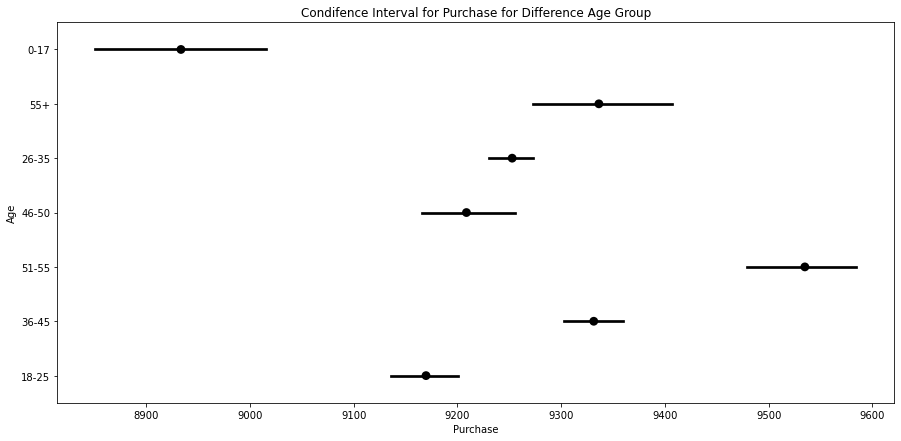

In [59]:
plt.figure(figsize=(15,7))
sns.pointplot(data=mart,x='Purchase',y='Age',color='black',grid=True,join=False)
plt.title('Condifence Interval for Purchase for Difference Age Group')
plt.show()

# Graphical Analysis

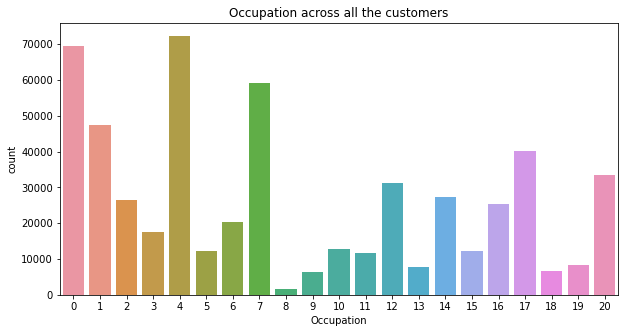

In [73]:
plt.figure(figsize=(10,5))
sns.countplot(x=mart['Occupation'])
plt.title('Occupation across all the customers')
plt.show()

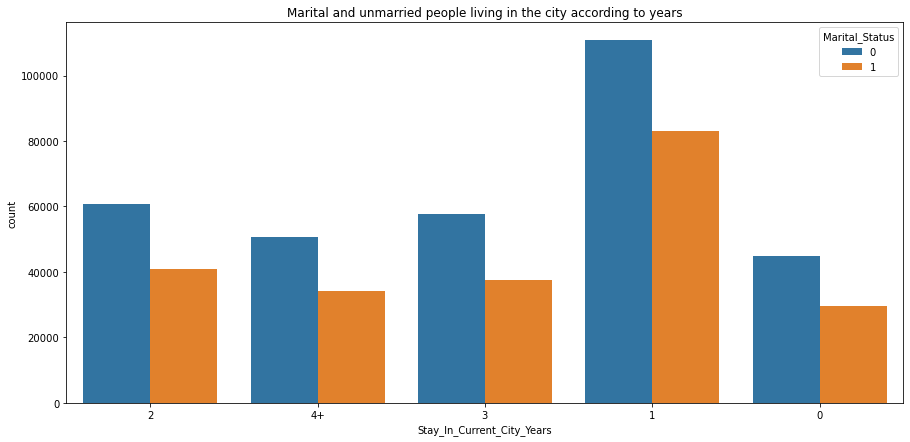

In [74]:
plt.figure(figsize=(15,7))
sns.countplot(x=mart['Stay_In_Current_City_Years'],hue=mart['Marital_Status'])
plt.title('Marital and unmarried people living in the city according to years')
plt.show()

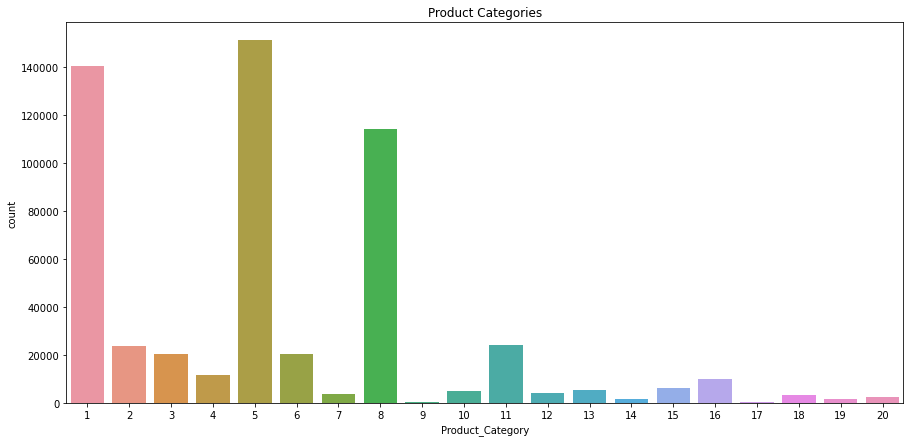

In [75]:
plt.figure(figsize=(15,7))
sns.countplot(x=mart['Product_Category'])
plt.title('Product Categories')
plt.show()

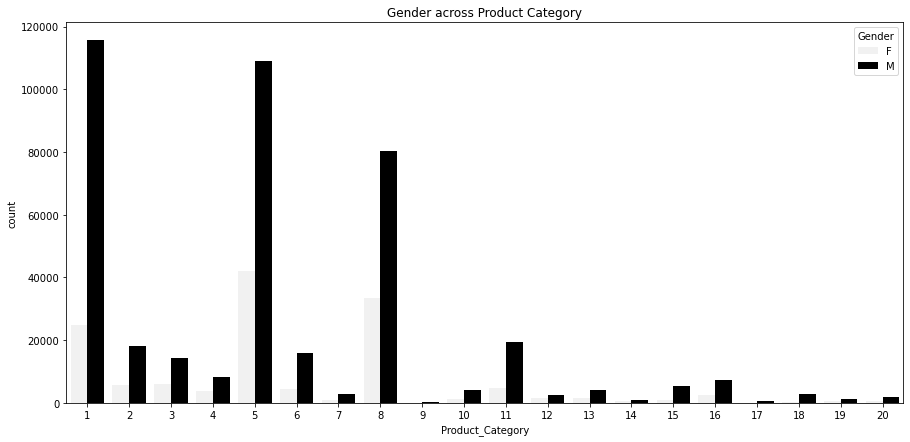

In [76]:
plt.figure(figsize=(15,7))
sns.countplot(x=mart['Product_Category'],hue=mart['Gender'],color='black')
plt.title('Gender across Product Category')
plt.show()

# Recommendations

    1. Walmart must focus on the age group between 25 to 35 more as they comprises about 40% of the market.
    
    2. Male customers comprises about  75% of the market so introducing new and diversified products with numerous range might help..
    
    3. Female customers should be put on target as the mean purchase is low for female customers. So new brands should be introduced that varies in prices.
    
    4. Purchasing power of Age group of 51+ have a much higher rate so products range for then should be diversified.
    
    

# Insights


1.With a 95 % confidence interval, the average of female purchase mean lies between 8709.2115471406 to 8759.919983170272.

2.With a 95 % confidence interval, the average of male purchase mean lies between 9422.01944736257 to 9453.032633581959.

3.With a 95 % confidence interval, the average of married purchase mean lies between 9248.61641818668 to 9283.198819656332.

4.With a 95 % confidence interval, the average of unmarried purchase mean lies between 9240.460427057078 to 9281.888721107669.

5.The confidence interval of Unmarried customers and Married Customers Overlap the most.

6.The confidence interval of male and female customers does not overlap.

7.Occupation labelled as 0, 4 and 7 are more dominant.

8.Both Female and Male cutomers have a median purchase of $7914 and $8098.

9.Both Married and Unmarried customers have a median purchase of $8044 and $8051.

10.Age group between 18-45 comprises about 80% of the market.

11.Purchasing power of Age group of 51+ have a much higher rate.

# Submitted by:
## Noohi Naaz